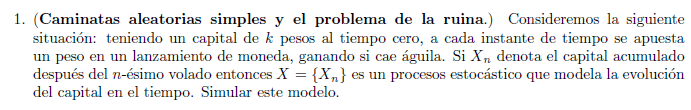

1. **Definición de la función y parámetros**: La función `AyS` simula la evolución del capital con tres parámetros:
   - `c`: capital inicial del jugador.
   - `l`: número de lanzamientos a realizar.
   - `pa`: probabilidad de ganar en cada lanzamiento.

2. **Inicialización del capital**: Se crea un array `capital` de tamaño `l + 1`, donde cada posición representa el capital en cada lanzamiento. El valor inicial es `c`.

3. **Simulación de lanzamientos**:
   - Se definen dos posibles estados: `1` (ganar) y `-1` (perder).
   - En cada lanzamiento, se elige uno de estos estados con probabilidad `pa` para ganar y `1 - pa` para perder.
   - Si el lanzamiento es favorable, se suma `1` al capital, y si no, se resta `1`. Este valor se guarda en `capital`.

4. **Retorno y visualización**:
   - La función devuelve el array `capital`, que contiene el capital en cada paso.
   - Luego, se grafica la evolución del capital a lo largo de los lanzamientos, mostrando cómo cambia el capital en el tiempo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def AyS(c, l, pa):
    
    
    # Inicializa el vector de capital, con tamaño de l + 1 para incluir el capital inicial.
    capital = np.zeros(l + 1)
    capital[0] = c  # Establece el capital inicial.
    
    # Define las probabilidades de ganar o perder.
    p = [pa, 1 - pa]  # Probabilidad de ganar (pa) y perder (1 - pa).
    
    # Define los estados posibles, donde 1 representa ganar y -1 representa perder.
    states = [1, -1]

    # Realiza la simulación de lanzamientos.
    for i in range(1, l + 1):
        # Selecciona aleatoriamente entre ganar o perder usando las probabilidades definidas.
        lanzamiento = np.random.choice(states, p=p)
        
        # Actualiza el capital acumulado sumando el resultado del lanzamiento actual.
        capital[i] = capital[i - 1] + lanzamiento
    
    return capital



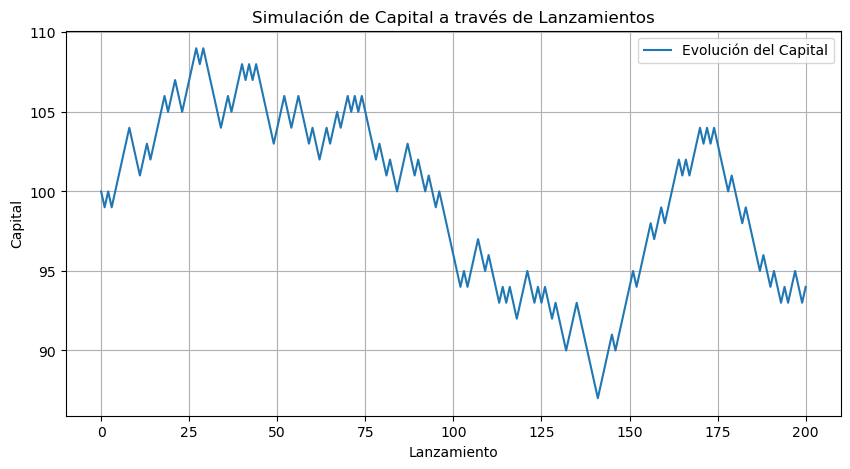

In [2]:
# Define los parámetros para la simulación
resultado = AyS(100, 200, 0.5)
# AyS = (mi capital inicial, el número de lanzamientos, probabilidad de que sea águila)

# Configura el tamaño de la figura para una visualización clara
plt.figure(figsize=(10, 5))

# Grafica el resultado de la simulación, mostrando la evolución del capital en el tiempo
plt.plot(resultado, label="Evolución del Capital")
plt.xlabel("Lanzamiento")    # Etiqueta del eje x
plt.ylabel("Capital")        # Etiqueta del eje y
plt.title("Simulación de Capital a través de Lanzamientos")  # Título del gráfico
plt.legend()  # Muestra la leyenda
plt.grid(True)  # Añade una cuadrícula para facilitar la lectura
plt.show()  # Muestra el gráfico


2. Considere una partícula que se mueve en un conjunto de m+1 nodos, etiquetados por 0,1,...,m distribuidos en un círculo. Sea $X_n$ la posición de la partícula después de n pasos y supongamos que se mueve a los nodos vecinos con igual probabilidad. Simule este proceso.

1. En este caso, la partícula puede estar en uno de m+1 nodos, que están conectados de forma circular. Por lo que la partícula se puede mover hacia el nodo de la izquierda o la derecha

2. En cada paso del proceso, la partícula se mueve a uno de los nodos vecinos con igual probabilidad (0.5)

3. Se toma probabilidad 0.5 si avanza hacia la izquierda o derecha.

4. Le pedimos al usuario que nos diga cuantos nodos quiere que tenga el círculo y cuantos pasos quiere que realice la partícula.

5. Iniciamos a la partícula en el nodo 0.

6. Realizamos el ciclo hasta que te realicen los pasos que dio el usuario

7. En cada paso simulamos una variable aleatoria $\xi$ con el vector (0.5,0.5). Calculamos el nodo en el que estará como: $X_{N-1} = X_0 + \xi_n$
En caso de que la posición sea el 0, y la partícula avance -1 paso, la posición de la partícula sera m

8. Al cumplir el número de pasos del usuario, se da la posición en que se mantuvo la partícula

In [3]:
import numpy as np
import pandas as pd

def Cam(m, n):
    posi = 0 #Primer posición, nodo 0
    lista = []
    
    for i in range(n): #Se realiza el ciclo hasta el número de pasos que da el usuario
        if posi == 0: 
            lista.append(posi)
            posi = m
            lista.append(posi)
        else: 
            # Simular el paso (izquierda o derecha)
            e = np.random.choice([-1, 1], p=[0.5, 0.5])
            posi += e
            
            # Limitar la posición entre 0 y m
            if posi > m:
                posi = 0
            elif posi < 0:
                posi = m
            
            lista.append(posi)
    
    return lista


In [12]:
m = int(input("Ingrese el número de nodos que desea tenga el círculo: ")) #Número de nodos que queremos
n = int(input("Número de pasos que desea: ")) #Número de simulaciones
caminata = Cam(m,n)
#caminata

tabla = pd.DataFrame({
    'Paso': range(1, len(caminata) + 1),
    'Posición Nodo': caminata
})

# Imprimir la tabla
print(tabla)


Ingrese el número de nodos que desea tenga el círculo: 2
Número de pasos que desea: 5
   Paso  Posición Nodo
0     1              0
1     2              2
2     3              0
3     4              0
4     5              2
5     6              0
6     7              0
7     8              2


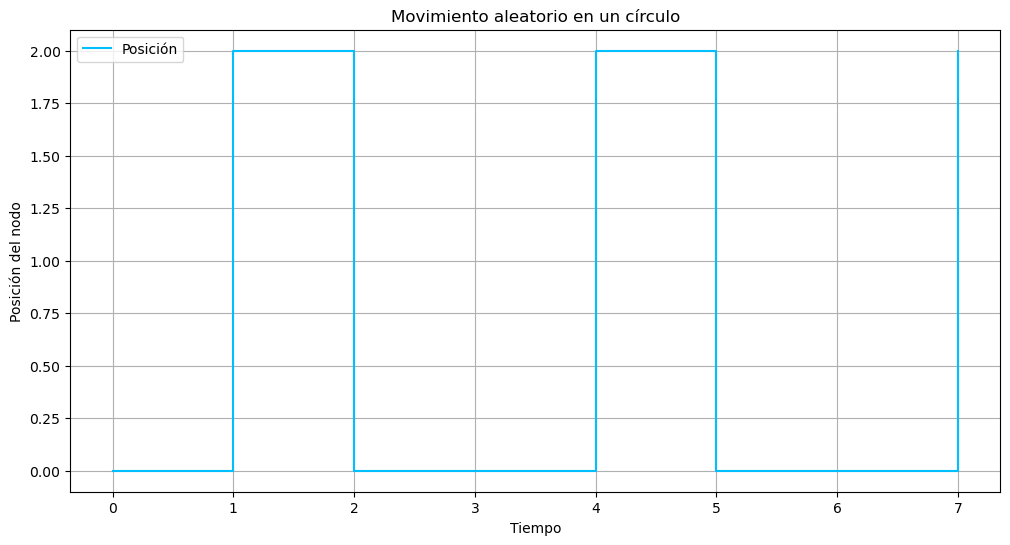

In [13]:
plt.figure(figsize = (12,6))
plt.plot(caminata, drawstyle = 'steps-post', color = "deepskyblue", label = 'Posición')
plt.xlabel('Tiempo')
plt.ylabel('Posición del nodo')
plt.title('Movimiento aleatorio en un círculo')
plt.grid(True, linestyle = "-")
plt.legend()
plt.show()

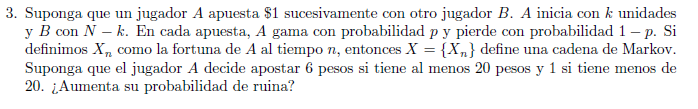

1. El código estima la probabilidad de ruina de un jugador que realiza una serie de apuestas con una probabilidad de ganar definida. Se consideran dos estrategias de apuesta:
   - Apuesta **variable**: el jugador apuesta una cantidad mayor cuando su capital supera un cierto umbral.
   - Apuesta **fija**: el jugador siempre apuesta la misma cantidad.

2. **Función `simulruina_variable`**:
   - **Parámetros**:
     - `M`: capital inicial.
     - `N`: objetivo de capital.
     - `pa`: probabilidad de ganar en cada jugada.
     - `size`: número de simulaciones.
   - **Estrategia de apuesta variable**:
     - Si el capital del jugador es al menos 20, apuesta 6. De lo contrario, apuesta 1.
   - **Simulación**:
     - En cada jugada, se calcula si el jugador gana o pierde según `pa`.
     - Si el capital alcanza 0, se considera que el jugador ha llegado a la ruina.
   - **Salida**:
     - Calcula y devuelve la probabilidad de ruina como la proporción de veces que el jugador ha perdido todo el capital.
   - **Visualización**:
     - Muestra un gráfico de la evolución del capital en una de las simulaciones.

3. **Función `simulruina_fija`**:
   - **Parámetros**: Igual que `simulruina_variable`.
   - **Estrategia de apuesta fija**:
     - Apuesta siempre 1 sin importar el capital actual.
   - **Simulación** y **Salida**:
     - Igual que en `simulruina_variable`.
   - **Visualización**:
     - Muestra un gráfico de la evolución del capital en una de las simulaciones con apuesta fija.


In [14]:
import numpy as np
import matplotlib.pyplot as plt

def simulruina_variable(M, N, pa, size):
   
    contador_ruina = 0  # Contador para el número de veces que el jugador llega a la ruina
    states = [1, -1]    # Estados posibles: ganar (1) o perder (-1)
    p = [pa, 1 - pa]     # Probabilidades de ganar o perder

    # Realizar la simulación `size` veces
    for i in range(size):
        capital = M  # Capital inicial para cada simulación
        capital_eventos = [capital]  # Registra el capital en cada paso de la simulación

        # Continua mientras el capital esté entre 0 y N (no ha ganado ni perdido todo)
        while 0 < capital < N:
            # Define la cantidad apostada en función del capital actual
            apuesta = 6 if capital >= 20 else 1

            # Simula el resultado de la apuesta
            resultado = np.random.choice(states, p=p)
            capital += apuesta * resultado  # Actualiza el capital según el resultado
            capital_eventos.append(capital)  # Guarda el capital después de la apuesta

        # Verifica si el jugador llegó a la ruina
        if capital <= 0:
            contador_ruina += 1  # Incrementa el contador de ruina

    # Graficar la evolución del capital de una simulación
    plt.plot(capital_eventos)
    plt.xlabel('Número de jugadas')
    plt.ylabel('Capital del Jugador')
    plt.title('Evolución del capital con apuesta variable')
    plt.show()

    # Calcula la probabilidad de ruina como la proporción de simulaciones que llegaron a la ruina
    probabilidad_ruina = contador_ruina / size
    return probabilidad_ruina


def simulruina_fija(M, N, pa, size):
  
    contador_ruina = 0  # Contador para el número de veces que el jugador llega a la ruina
    states = [1, -1]    # Estados posibles: ganar (1) o perder (-1)
    p = [pa, 1 - pa]     # Probabilidades de ganar o perder

    # Realizar la simulación `size` veces
    for i in range(size):
        capital = M  # Capital inicial para cada simulación
        capital_eventos = [capital]  # Registra el capital en cada paso de la simulación

        # Continua mientras el capital esté entre 0 y N
        while 0 < capital < N:
            # Apuesta fija de $1 en cada jugada
            resultado = np.random.choice(states, p=p)
            capital += 1 * resultado  # Actualiza el capital con el resultado de la apuesta
            capital_eventos.append(capital)  # Guarda el capital después de la apuesta

        # Verifica si el jugador llegó a la ruina
        if capital <= 0:
            contador_ruina += 1  # Incrementa el contador de ruina

    # Graficar la evolución del capital de una simulación
    plt.plot(capital_eventos)
    plt.xlabel('Número de jugadas')
    plt.ylabel('Capital del Jugador')
    plt.title('Evolución del capital con apuesta fija')
    plt.show()

    # Calcula la probabilidad de ruina como la proporción de simulaciones que llegaron a la ruina
    probabilidad_ruina = contador_ruina / size
    return probabilidad_ruina



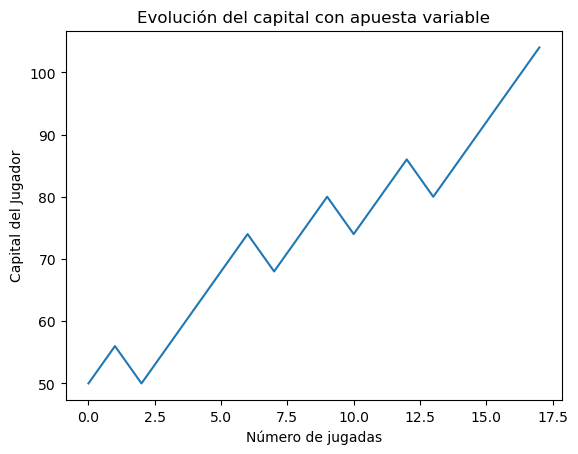

La probabilidad de ruina del jugador con apuesta variable es 0.513


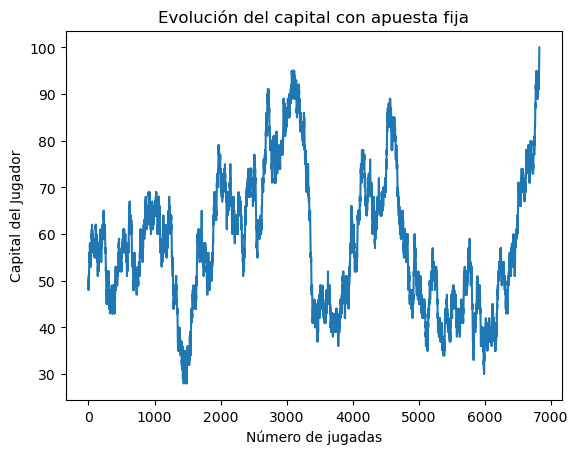

La probabilidad de ruina del jugador con apuesta fija es 0.51


In [15]:
# Parámetros de la simulación
size = 1000   # Número de simulaciones a realizar
M = 50        # Capital inicial del jugador
N = 100       # Capital objetivo del jugador
pa = 0.5      # Probabilidad de ganar en cada jugada

# Verificamos que el capital inicial sea menor que el objetivo
if M >= N:
    print("El capital inicial del jugador debe ser menor que la cantidad total en juego.")
else:
    # Realiza la simulación con apuesta variable
    probabilidad_ruina_variable = simulruina_variable(M, N, pa, size)
    print(f'La probabilidad de ruina del jugador con apuesta variable es {probabilidad_ruina_variable}')
    
    # Realiza la simulación con apuesta fija
    probabilidad_ruina_fija = simulruina_fija(M, N, pa, size)
    print(f'La probabilidad de ruina del jugador con apuesta fija es {probabilidad_ruina_fija}')


4. Consideramos la fila en un banco y supongamos que los clientes van llegando a tiempos aleatorios, cada uno requiere un servicio que es también una variaable aleatoria. Suponga que los arribos entre los clientes siguen una distribución exponencial con parámetros $\lambda$ y que las variables aleatorias que modelan el tiempo de servicio son gobernadas por una distribución común y además son independientes (exponenciales de parámetros $\mu$). Proponer un modelo y estimar los tiempos de servicio hasta atender a los clientes en el bamco al tiempo t.

1. Definimos t = NA = ND = 0
    ES = 0
   Generamos el primer tiempo de llegada del primer usuario, con una exponencial con parámetro $\lambda$, tA= T0, y tD = $\infty$

2. El proceso de líneas de espera, se realizara mientras el tiempo de t < T o hayan clientes dentro del sistema.

3. Caso 1, tA <= tD y tA <=T

    a) t = tA se establece el tiempo de llegada del cliente
   
    b) NA = NA +1 hay una llegada adicional en el instante tA
   
    c) n = n + 1 llega un cliente más
   
    d) generamos un nuevo tiempo de llegada Tt, y tA = Tt (hora de la siguiente   llgada)
   
    e) Si n = 1, generamos el tiempo de salida del cliente Y, tD = T + Y

   f) Guardamos el tiempo en que salio el cliente, pues el cliente NA llega en el instante t

5. Caso 2, tD < tA y tD <= T

   a) t = tD

   b) n = n - 1

   c) ND = ND + 1, salida del cliente en el tiempo t

   d) Si n = 0, hacer tD = ∞, en caso contrario, generar Y y hacer
 tD = t +Y.

   e) 
 Reunir los datos de salida D(ND) = t (pues el cliente ND acaba de salir)


.7. Caso 3, min(tA,tD) > T,n > 0:


   a) t = tD

   b)  n = n − 1

   c) : ND = ND +

   d) 
 Si n > 0, generar Y y hacer tD = t 

   e) Y
 Reunir los dartos de salida D(ND) =
 8. Caso 4, min(tA,tD)>T,n=0,

   Tp=máx(t−T,0)t.





Descripción General del Proceso

Parámetros de Entrada:


T: Tiempo total de la simulación.

lam: Tasa de llegada de clientes (media de llegadas por unidad de tiempo).

miu: Tasa de servicio (media de servicios por unidad de tiempo).


Variables Iniciales:

t: Tiempo actual del sistema.

NA: Número de llegadas registradas hasta el momento.

ND: Número de salidas (clientes que han sido atendidos y han salido del sistema).

n: Número de clientes en el sistema.

LE: Lista que almacena los eventos (llegadas y salidas).

tD: Tiempo de salida del cliente que está siendo atendido.

tA: Tiempo de la siguiente llegada.

Tp: Tiempo de salida de los clientes después del tiempo total 𝑇


Simulación de Llegadas:

Genera la primera llegada utilizando una distribución exponencial, que es común en modelos de colas.

En cada iteración del bucle principal, se determina si el próximo evento es una llegada o una salida:

Llegada:
    Actualiza el tiempo al de la llegada.
    
    Incrementa el contador de llegadas y el número de clientes en el sistema.
    
    Registra el evento de llegada en la lista LE.
    
    Genera el tiempo hasta la próxima llegada.
    
    Si hay un cliente en el sistema (el primero), genera el tiempo de servicio.
    
Salida:

    Actualiza el tiempo al de la salida.
    
    Decrementa el número de clientes en el sistema y el contador de salidas.
    
    Si ya no hay más clientes, establece tD a infinito.
    
    Si hay más clientes, genera el tiempo de servicio para el siguiente cliente.
    
    Registra el evento de salida en la lista LE.

Condiciones de Finalización:

Si no hay más eventos y el sistema está vacío, se calcula el tiempo posterior a 𝑇

El bucle continúa hasta que el tiempo actual 𝑡 supera el tiempo total 𝑇 y no hay más clientes en el sistema.

Salida de Resultados:

Convierte la lista de eventos LE en un DataFrame de pandas para facilitar la visualización y análisis.


In [16]:
import numpy as np
import pandas as pd

# Definición de la función de simulación de línea de espera
def linea_espera(T, lam, miu):
    # Inicialización de variables
    t = 0  # Tiempo actual
    NA = 0  # Número de llegadas (hasta el instante t)
    ND = 0  # Número de salidas (hasta el instante t)
    ES = 0
    n = 0   # Número de clientes en el sistema
    LE = []  # Lista para almacenar eventos (ahora como lista dinámica)
    tD = float('inf')  # Tiempo de salida del cliente que está siendo atendido
    tA = 0  # Hora de la siguiente llegada
    Tp = 0  # Tiempo de salida del último cliente, posterior a T
    
    # Generamos la primera llegada con distribución exponencial
    u = np.random.random()
    t0 = (-1 / lam) * np.log(u)  # Primera llegada
    tA = t0

    while t < T or n > 0:
        # Caso 1: Siguiente evento es una llegada
        if tA <= tD and tA <= T:
            t = tA  # Actualizamos el tiempo al tiempo de llegada
            NA = NA + 1  # Aumentamos el número de llegadas
            n = n + 1   # Un cliente más en el sistema
            LE.append([t, 0, n, t])  # Registramos la llegada en la lista de eventos

            # Generar la próxima llegada
            u2 = np.random.random()
            Tt = (-1 / lam) * np.log(u2)
            tA = t + Tt  # Hora de la Aacumulada de llegadas
            # Si hay un cliente en el sistema (n == 1), generamos el tiempo de servicio
            if n == 1:
                u3 = np.random.random()
                Y = (-1 / miu) * np.log(u3)
                tD = t + Y  # Hora de salida del primer cliente
            #LE.append([Tt, tD, n, tA]) #Guardamos, el tiempo de la nueva llegada y el acumlado de la llegada anterior + la nueva llegada, y la hora de salid
            
        # Caso 2: Siguiente evento es una salida
        elif tD <= tA and tD <= T:
            t = tD  # Actualizamos el tiempo al tiempo de salida
            n = n - 1   # Un cliente menos en el sistema
            ND = ND + 1  # Aumentamos el número de salidas
            
            
            # Si no hay más clientes en el sistema, asignamos infinito a tD
            if n == 0:
                tD = float('inf')
            else:
                # Generar el tiempo de servicio para el siguiente cliente
                u3 = np.random.random()
                Y = (-1 / miu) * np.log(u3)
                tD = t + Y  # Calcula el nuevo tiempo de salida
            LE.append([0, t, n, t])  # Registramos la salida en la lista de eventos

        # Caso 3: Se han terminado los eventos de llegada y salida
        elif min(tA, tD) > T and n > 0:
            t = tD  # Actualizamos el tiempo al tiempo de salida
            n = n - 1   # Un cliente menos en el sistema
            ND = ND + 1  # Aumentamos el número de salidas
            LE.append([0, t, n, t])  # Registramos la salida

            if n > 0:
                u3 = np.random.random()
                Y = (-1 / miu) * np.log(u3)
                tD = t + Y  # Actualiza el tiempo de salida
        
        # Caso 4: No hay más eventos y el sistema está vacío
        elif min(tA, tD) > T and n == 0:
            Tp = max(t - T, 0)  # Tiempo después del tiempo total T
            #print("El tiempo despues de cerrar: ", Tp)
            break

    # Convertir LE a un DataFrame de pandas para visualización
    LE_df = pd.DataFrame(LE, columns=['Hora de Llegada', 'Hora de Salida', 'Clientes en el Sistema', 'Tiempo Acumulado'])

    
    return LE_df, Tp




In [17]:


T = float(input("Ingresa el tiempo total del sistema: "))
lam = float(input("Ingresa el valor de lambda: ")) #Tasa de llegada
miu = float(input("Ingresa el valor de miu: ")) #Tasa de servicio

resultados_df, Tp = linea_espera(T, lam, miu)

# Imprimir los resultados de la simulación
print("Resultados de la simulación:")
print(resultados_df)

print("El tiempo depués de cerrar: ")
print(Tp)

Ingresa el tiempo total del sistema: 5
Ingresa el valor de lambda: 5
Ingresa el valor de miu: 5
Resultados de la simulación:
    Hora de Llegada  Hora de Salida  Clientes en el Sistema  Tiempo Acumulado
0          0.215481        0.000000                       1          0.215481
1          0.000000        0.288134                       0          0.288134
2          0.376684        0.000000                       1          0.376684
3          0.410320        0.000000                       2          0.410320
4          0.000000        0.469923                       1          0.469923
5          0.547684        0.000000                       2          0.547684
6          0.000000        0.804519                       1          0.804519
7          0.000000        0.956384                       0          0.956384
8          1.266578        0.000000                       1          1.266578
9          0.000000        1.317299                       0          1.317299
10         1.5011

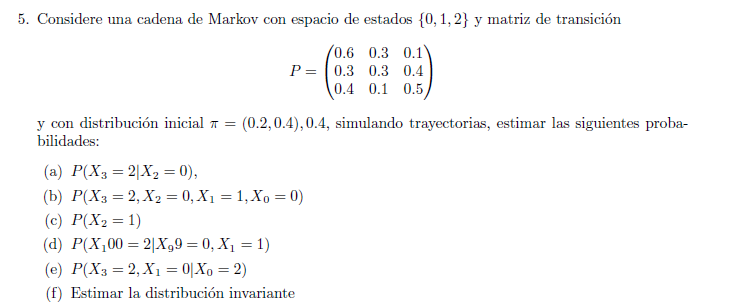

1. **Función `rmarkovchain`**:
   - Esta función simula una cadena de Markov utilizando una matriz de transición fija `P` y una distribución de probabilidad inicial `pi`.
   - **Parámetros**:
     - `pi`: distribución inicial que define las probabilidades de inicio en cada estado.
     - `pasos`: cantidad de pasos o transiciones a simular en la cadena.
   - **Simulación**:
     - Se elige un estado inicial en función de `pi`.
     - Para cada paso, el siguiente estado se determina de acuerdo con la probabilidad de transición en la matriz `P`, que define cómo un estado se mueve a otro.
     - La secuencia de estados a lo largo de los pasos se almacena y devuelve.

2. **Visualización de la Cadena de Markov**:
   - Se simula una trayectoria de 20 pasos usando una distribución inicial `[0.2, 0.4, 0.4]`.
   - Un gráfico de escalón (`plt.step`) muestra la secuencia de estados alcanzados en cada paso, ayudando a visualizar cómo la cadena evoluciona en el tiempo.
   - El gráfico incluye etiquetas en los ejes, un título, y una cuadrícula para facilitar la interpretación.


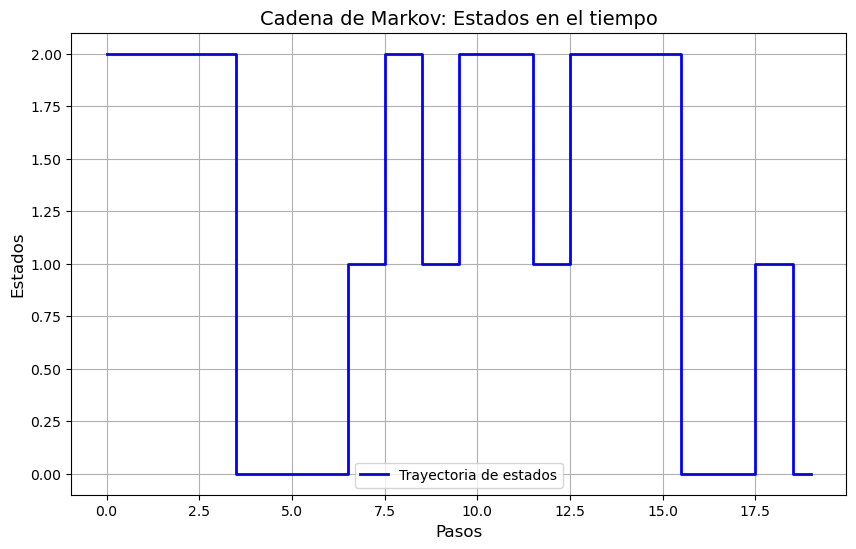

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def rmarkovchain(pi, pasos):  
    
    # Matriz de transición que define las probabilidades de cambio entre estados
    P = np.array([
        [0.6, 0.3, 0.1],  # Probabilidades de transición desde el estado 0
        [0.3, 0.3, 0.4],  # Probabilidades de transición desde el estado 1
        [0.4, 0.1, 0.5]   # Probabilidades de transición desde el estado 2
    ])
    
    states = [0, 1, 2]  # Lista de posibles estados en la cadena
    # Selecciona el estado inicial basado en la distribución inicial `pi`
    x = [np.random.choice(states, p=pi, size=1)[0]]
    
    # Simula la cadena de Markov por el número de pasos especificado
    for i in range(pasos - 1):
        estado_actual = x[-1]  # Obtiene el estado actual
        # Selecciona el siguiente estado basado en la fila correspondiente de la matriz P
        next_estado = np.random.choice(states, p=P[estado_actual])
        x.append(next_estado)  # Agrega el estado siguiente a la secuencia

    return np.array(x)  # Devuelve la secuencia de estados como un array

# Simular una trayectoria de la cadena de Markov
D = rmarkovchain([0.2, 0.4, 0.4], 20)

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Genera un gráfico de escalón que muestra los estados en cada paso
plt.step(range(len(D)), D, where='mid', color='blue', lw=2, label='Trayectoria de estados')

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Pasos', fontsize=12)
plt.ylabel('Estados', fontsize=12)
plt.title('Cadena de Markov: Estados en el tiempo', fontsize=14)

# Agrega cuadrícula y leyenda
plt.grid(True)
plt.legend()
plt.show()



In [19]:
import numpy as np
import matplotlib.pyplot as plt

def rmarkovchain(pi, pasos):  
    
    # Matriz de transición que define las probabilidades de transición entre estados
    P = np.array([
        [0.6, 0.3, 0.1],  # Probabilidades de transición desde el estado 0
        [0.3, 0.3, 0.4],  # Probabilidades de transición desde el estado 1
        [0.4, 0.1, 0.5]   # Probabilidades de transición desde el estado 2
    ])
    
    states = [0, 1, 2]  # Lista de posibles estados en la cadena de Markov
    # Selecciona el estado inicial basado en la distribución inicial `pi`
    x = [np.random.choice(states, p=pi, size=1)[0]]
    
    # Itera para simular la secuencia de la cadena de Markov
    for i in range(pasos - 1):
        estado_actual = x[-1]  # Obtiene el estado actual
        # Selecciona el siguiente estado basado en la matriz de transición `P`
        next_estado = np.random.choice(states, p=P[estado_actual])
        x.append(next_estado)  # Agrega el nuevo estado a la secuencia

    return np.array(x)  # Devuelve la secuencia de estados como un array




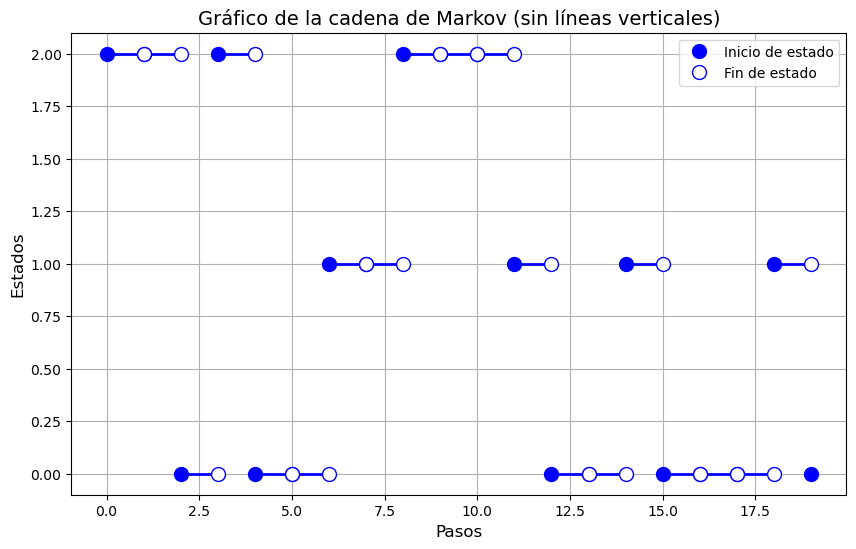

In [20]:
# Simular una trayectoria de la cadena de Markov
D = rmarkovchain([0.2, 0.4, 0.4], 20)

# Configurar la figura para la visualización
plt.figure(figsize=(10, 6))

# Dibujar líneas horizontales para los estados sin mostrar líneas verticales
for i in range(len(D) - 1):
    plt.hlines(D[i], i, i + 1, color='blue', lw=2)  # Líneas horizontales que representan el estado en cada paso

# Agregar puntos de inicio y fin de estado
plt.plot(range(len(D)), D, 'bo', markersize=10, label='Inicio de estado')  # Puntos rellenos al inicio de cada paso
plt.plot(range(1, len(D)), D[:-1], 'bo', mfc='white', markersize=10, label='Fin de estado')  # Puntos vacíos al final de cada paso

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Pasos', fontsize=12)
plt.ylabel('Estados', fontsize=12)
plt.title('Gráfico de la cadena de Markov (sin líneas verticales)', fontsize=14)

# Mejorar la cuadrícula y añadir la leyenda
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()


In [21]:
# Simulaciones
num_simulaciones = 1000
pasos = 120

# Contadores
ea = 0
eb = 0
ec = 0
ed = 0
ee = 0
total_ea = 0
total_ed = 0
total_ee = 0

# Realiza la simulación para cada uno de los casos
for i in range(num_simulaciones):
    D = rmarkovchain([0.2, 0.4, 0.4], pasos)
    
    # (a) P(X_3 = 2 | X_2 = 0): Probabilidad condicional
    if D[2] == 0:  # Si el estado en el paso 2 es 0
        total_ea += 1  # Cuenta los casos en que X_2 = 0
        if D[3] == 2:  # Verifica si X_3 es 2 en estos casos
            ea += 1
    
    # (b) P(X_3 = 2, X_2 = 0, X_1 = 1, X_0 = 0): Probabilidad conjunta
    if D[0] == 0 and D[1] == 1 and D[2] == 0 and D[3] == 2:
        eb += 1

    # (c) P(X_2 = 1): Probabilidad de que el estado en el paso 2 sea 1
    if D[2] == 1:
        ec += 1

    # (d) P(X_100 = 2 | X_99 = 0, X_1 = 1): Probabilidad condicional
    if D[99] == 0 and D[1] == 1:  # Condición: X_99 = 0 y X_1 = 1
        total_ed += 1
        if D[100] == 2:  # Verifica si X_100 es 2 en estos casos
            ed += 1

    # (e) P(X_3 = 2, X_1 = 0 | X_0 = 2): Probabilidad condicional
    if D[0] == 2:  # Condición: X_0 = 2
        total_ee += 1
        if D[1] == 0 and D[3] == 2:  # Verifica si X_1 = 0 y X_3 = 2 en estos casos
            ee += 1

# Cálculos de las probabilidades con manejo de divisiones por cero
prob_a = ea / total_ea if total_ea > 0 else 0
prob_b = eb / num_simulaciones
prob_c = ec / num_simulaciones
prob_d = ed / total_ed if total_ed > 0 else 0
prob_e = ee / total_ee if total_ee > 0 else 0

# Imprimir los resultados de cada probabilidad
print(f"(a) P(X_3 = 2 | X_2 = 0) = {prob_a:.4f}")
print(f"(b) P(X_3 = 2, X_2 = 0, X_1 = 1, X_0 = 0) = {prob_b:.4f}")
print(f"(c) P(X_2 = 1) = {prob_c:.4f}")
print(f"(d) P(X_100 = 2 | X_99 = 0, X_1 = 1) = {prob_d:.4f}")
print(f"(e) P(X_3 = 2, X_1 = 0 | X_0 = 2) = {prob_e:.4f}")

# (f) Estimar la distribución invariante
D_finales = [rmarkovchain([0.2, 0.4, 0.4], pasos)[-1] for i in range(num_simulaciones)]
unique, counts = np.unique(D_finales, return_counts=True)
distribucion_invariante = counts / num_simulaciones
print(f"(f) Distribución invariante estimada: {dict(zip(unique, distribucion_invariante))}")


(a) P(X_3 = 2 | X_2 = 0) = 0.1096
(b) P(X_3 = 2, X_2 = 0, X_1 = 1, X_0 = 0) = 0.0010
(c) P(X_2 = 1) = 0.2230
(d) P(X_100 = 2 | X_99 = 0, X_1 = 1) = 0.0820
(e) P(X_3 = 2, X_1 = 0 | X_0 = 2) = 0.0990
(f) Distribución invariante estimada: {0: 0.464, 1: 0.247, 2: 0.289}


6. Considere una Cadena de Ehrenfest. Estimar el número de pasos esperados para cambiar las bolas de urna



1. Sean i bolas en la urna A y N-i bolas en la urna B

2. $X_n$ es el número de bolas en la urna A después de n selecciones

3. Entonces {$X_n : n = 0,1,...$} es una cadena de Markov con espacio de estados $S = {0, 1, ..., N}$ y probabilidades de transición


4. $P_{0,1} = 1, P_{N,N-1} = 1$ y para i = 1,..., N-1: $P_{i,j}: (N-i)/N$ si $j=i+1, e i/N si j=j-1$

5. El proceso de Cadena de Ehrenfest se puede simular como una caminata aletorea, ya que en cada paso aumenta o disminuye 1, solo cambiando la probabilidad de cada estado.
    Por lo que vemos con cuantas bolas i inicia la urna A, y vemos hacia que dirección es el paso siguiente con el vector de probabilidades (i/N, (N-i)/N) para ver si se le agrega una bola a la urna A o se le quita una bola a la urna A

6. Se realiza este proceso hasta que la urna A tenga cero bolas

7. Se realizan varias simulaciones para saber cual es la media del número de pasos que utiliza

In [22]:
import numpy as np

def Cad_eh(N, i): #Función de una cadena Ehrenfest
    # Inicializamos las posiciones de las urnas
    A = i
    B = N - i
    contador = 0  # Contador de iteraciones
    lista = []  # Creamos un array para almacenar las posiciones

    # Mientras A no esté vacía
    while A > 0:
        # Elegimos un paso aleatorio: -1 (hacia atrás) con probabilidad (A/N) y +1 (hacia adelante) con probabilidad (B/N)
        paso = np.random.choice([-1, 1], p=[A / N, B / N])  # Elegimos si restar 1 o sumar 1
        A = A + paso  # Actualizamos el número de bolas en la urna A
        B = N - A  # Actualizamos el número de bolas en la urna B
        lista.append(A)  # Guardamos la nueva posición de A
        contador = contador + 1  # Incrementamos el contador de iteraciones

    return np.array(lista), contador



In [23]:

def ciclo(N, i, n):
    # Ejecutar múltiples simulaciones para calcular la media de pasos
    total = []
    
    for j in range(n):  # Cambié i por j para evitar confusiones
        li, simulacion = Cad_eh(N, i)  # Usamos el mismo i pasado a la función
        total.append(simulacion) #Guarda cuantos pasos necesita para que la urna A quede en 0
    
    # Calcular la media de pasos
    media_pasos = np.mean(total)
 
    return total, media_pasos


In [25]:
N = float(input("Ingresa el número total de bolas bolas: "))
i = float(input("Ingresa el número de bolas en la urna i: "))
n = int(input("Ingrea el número de simulaciones: "))

total, media = ciclo(N,i,n)
print("Pasos: ", media)

Ingresa el número total de bolas bolas: 8
Ingresa el número de bolas en la urna i: 5
Ingrea el número de simulaciones: 5
Pasos:  245.4


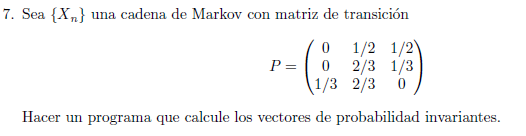

1. **Función `rmarkovchain_simulaciones`**:
   - **Objetivo**: Simular una cadena de Markov a partir de una matriz de transición `P` y una distribución inicial `pi_inicial`.
   - **Proceso**:
     - Comienza en un estado inicial determinado aleatoriamente según `pi_inicial`.
     - Para cada paso, elige el siguiente estado según las probabilidades de la fila correspondiente en `P`.
   - **Salida**: Devuelve la secuencia de estados a lo largo de los pasos simulados.

2. **Estimación del Vector Invariante**:
   - **Simulación a Largo Plazo**:
     - Se simulan `100,000` pasos de la cadena con una distribución inicial uniforme (`[1/3, 1/3, 1/3]`), asegurando suficiente tiempo para aproximarse a una distribución invariante.
   - **Cálculo de Frecuencias Relativas**:
     - Se calcula la frecuencia de cada estado en la secuencia resultante, que proporciona una estimación del vector de probabilidad invariante.
   - **Resultado**: El vector de probabilidad invariante estimado se imprime como un diccionario que mapea cada estado a su frecuencia relativa.


In [26]:
import numpy as np

# Matriz de transición
P = np.array([
    [0, 1/2, 1/2],    # Probabilidades de transición desde el estado 0
    [0, 2/3, 1/3],    # Probabilidades de transición desde el estado 1
    [1/3, 2/3, 0]     # Probabilidades de transición desde el estado 2
])

def rmarkovchain_simulaciones(P, pi_inicial, pasos):  
    
    states = [0, 1, 2]  # Lista de posibles estados
    x = [np.random.choice(states, p=pi_inicial)]  # Selecciona un estado inicial basado en `pi_inicial`
    
    # Simula la cadena de Markov durante el número de pasos indicado
    for i in range(pasos - 1):
        estado_actual = x[-1]  # Obtiene el estado actual
        # Determina el siguiente estado basado en la fila correspondiente de `P`
        next_estado = np.random.choice(states, p=P[estado_actual])
        x.append(next_estado)  # Añade el siguiente estado a la secuencia

    return np.array(x)  # Devuelve la secuencia de estados como un array

# Parámetros para simulaciones a largo plazo
num_simulaciones = 100000  # Número total de simulaciones
pasos = 100000  # Número de pasos para alcanzar una distribución invariante

# Distribución inicial (se usa una distribución uniforme)
pi_inicial = [1/3, 1/3, 1/3]

# Simular la cadena de Markov
D = rmarkovchain_simulaciones(P, pi_inicial, pasos)

# Calcular las frecuencias relativas de los estados
unique, counts = np.unique(D, return_counts=True)
vector_invariante_simulado = counts / pasos  # Vector de probabilidad invariante estimado

# Imprimir el resultado
print(f"El vector de probabilidad invariante estimado es: {dict(zip(unique, vector_invariante_simulado))}")



El vector de probabilidad invariante estimado es: {0: 0.08715, 1: 0.65175, 2: 0.2611}


8. Generar un proceso de Poisson de parámetro $\lambda = 2.5$

1. Sea N(s) tiene distribución Poisson con parámetro $\lambda s$

2. Ingresamos el valor de $\lambda = 2.5 $ con un tiempo 1, realizamos 1000 simulaciones para obtener la media

3. Mientras el tiempo generado del tiempo acumulado de exponenciales sea menor que S:

4. Generamos un número aleatorio, y al tiempo máximo le restamos el tiempo simulado con una exponencial

5. Contamos cuantos tiempos se general

6. Como el número de tiempos varia, calculamos la media.

In [27]:
import numpy as np  # Importar la biblioteca NumPy para operaciones numéricas

def poisson(lam, s, n):

    
    lista1 = []  # Lista para almacenar el número de eventos en cada simulación
    lista2 = []  # Lista para almacenar el tiempo final de cada simulación (opcional, no se utiliza después)

    for i in range(n):  # Realizar n simulaciones
        t = 0  # Inicializar el tiempo actual
        m = 0  # Contador para el número de eventos

        while t < s:  # Mientras el tiempo actual sea menor que el tiempo de simulación
            u = np.random.random()  # Generar un número aleatorio entre 0 y 1
            t = t - ((1 / lam) * np.log(u))  # Calcular el tiempo hasta el próximo evento utilizando la distribución exponencial
            m = m + 1  # Incrementar el contador de eventos

        lista1.append(m)  # Agregar el número de eventos de esta simulación a la lista
        lista2.append(t)  # Agregar el tiempo final de esta simulación a la lista (opcional, no se utiliza después)

    return np.array(lista1)  # Devolver un array de numpy con el número de eventos de cada simulación


In [28]:
poisson(2.5,1,10000).mean()

3.5257

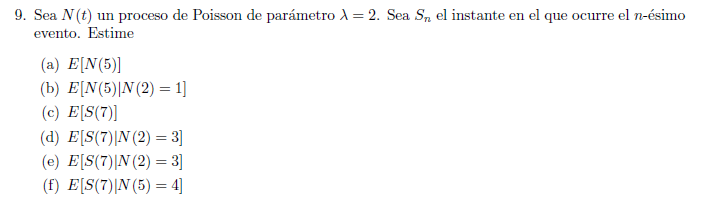

1. **Función `exp`**:
   - **Objetivo**: Generar `n` muestras de una distribución exponencial con parámetro `λ` (lambda).
   - **Proceso**:
     - Genera números aleatorios `u` entre 0 y 1, y los transforma usando la fórmula de la distribución exponencial.
   - **Salida**: Devuelve un array de `n` valores distribuidos exponencialmente.

2. **Función `simular_poisson`**:
   - **Objetivo**: Simular un proceso de Poisson hasta un tiempo máximo `t_max`, generando los tiempos en los que ocurren eventos.
   - **Proceso**:
     - Comienza en un tiempo inicial `t_actual = 0`.
     - Para cada evento, calcula el tiempo entre eventos usando `exp` y actualiza `t_actual` hasta alcanzar `t_max`.
     - Guarda cada tiempo acumulado (momento de ocurrencia de cada evento) en la lista `tiempos`.
   - **Salida**: Devuelve un array con los tiempos de cada evento en el proceso.


In [29]:
import numpy as np
import math

# Función exponencial proporcionada
def exp(n, l):
    
    lista = []
    for a in range(n):
        u = np.random.random()  # Genera un número aleatorio entre 0 y 1
        x = -((1 / l) * np.log(1 - u))  # Transforma `u` para obtener un valor exponencial
        lista.append(x)  # Agrega el valor generado a la lista
    return np.array(lista)

# Simulaciones del proceso de Poisson
def simular_poisson(lam, t_max):
    
    tiempos = []  # Lista para almacenar los tiempos de cada evento
    t_actual = 0  # Tiempo inicial

    while t_actual < t_max:
        # Generar el tiempo entre eventos usando la función exponencial
        t = exp(1, lam).mean()  # Tiempo entre eventos sucesivos
        t_actual += t  # Actualiza el tiempo actual
        tiempos.append(t_actual)  # Guarda el tiempo acumulado para el evento

    return np.array(tiempos)  # Devuelve el array de tiempos de eventos




In [30]:
# Parámetros de simulación
num_simulaciones = 1000  # Número de simulaciones para calcular la media

# (a) E[N(5)]: Esperanza del número de eventos en el intervalo [0, 5]
N5 = [np.sum(simular_poisson(2, 5) <= 5) for i in range(num_simulaciones)]

# Cálculo de la media de eventos en el tiempo 5
print(f"(a) E[N(5)] = {np.mean(N5):.4f}")




(a) E[N(5)] = 10.0450


In [31]:
# Parámetros de simulación
num_simulaciones = 1000  # Número de simulaciones

# (b) E[N(5) | N(2) = 1]: Esperanza condicional del número de eventos hasta el tiempo 5 dado N(2) = 1
N5_condicional = []
for i in range(num_simulaciones):
    tiempos = simular_poisson(2, 5)  # Simula el proceso de Poisson hasta el tiempo 5
    N2 = np.sum(tiempos <= 2)  # Cuenta el número de eventos hasta el tiempo 2
    
    # Condición: solo considerar simulaciones donde N(2) = 1
    if N2 == 1:
        N5_condicional.append(np.sum(tiempos <= 5))  # Cuenta el número de eventos hasta el tiempo 5

# Cálculo de la esperanza condicional
print(f"(b) E[N(5) | N(2) = 1] = {np.mean(N5_condicional):.4f}")




(b) E[N(5) | N(2) = 1] = 6.6111


In [32]:
# (c) E[S_7]: Esperanza del tiempo de ocurrencia del séptimo evento
S7 = [simular_poisson(2, 100)[6] for i in range(num_simulaciones)]  # 7mo evento en cada simulación

# Cálculo de la media de los tiempos de ocurrencia del séptimo evento
print(f"(c) E[S_7] = {np.mean(S7):.4f}")




(c) E[S_7] = 3.4613


In [33]:
# (d) E[S_7 | N(2) = 3]: Esperanza condicional del tiempo del séptimo evento dado N(2) = 3
S7_condicional = []
for i in range(num_simulaciones):
    tiempos = simular_poisson(2, 7)  # Simula los tiempos de eventos hasta el 7mo evento
    N2 = np.sum(tiempos <= 2)  # Cuenta el número de eventos hasta el tiempo 2
    
    # Condición: Solo considerar simulaciones donde N(2) = 3
    if N2 == 3:
        S7_condicional.append(tiempos[6])  # Agrega el tiempo del 7mo evento

# Cálculo de la esperanza condicional
print(f"(d) E[S_7 | N(2) = 3] = {np.mean(S7_condicional):.4f}")




(d) E[S_7 | N(2) = 3] = 3.9544


In [34]:
# (e) E[S_7 | N(2) = 3]: Esperanza condicional del tiempo del séptimo evento dado N(2) = 3
S7_condicional_2 = []
for i in range(num_simulaciones):
    tiempos = simular_poisson(2, 7)  # Simula los tiempos de eventos hasta el 7mo evento
    N2 = np.sum(tiempos <= 2)  # Cuenta el número de eventos hasta el tiempo 2
    
    # Condición: Solo considerar simulaciones donde N(2) = 3
    if N2 == 3:
        S7_condicional_2.append(tiempos[6])  # Agrega el tiempo del 7mo evento

# Cálculo de la esperanza condicional
print(f"(e) E[S_7 | N(2) = 3] = {np.mean(S7_condicional_2):.4f}")


(e) E[S_7 | N(2) = 3] = 3.9100


In [35]:
# (f) E[S_7 | N(5) = 4]: Esperanza condicional del tiempo del séptimo evento dado N(5) = 4
S7_condicional_3 = []
for i in range(num_simulaciones):
    tiempos = simular_poisson(2, 10)  # Aumenta t_max a 10 para asegurar el 7mo evento
    N5 = np.sum(tiempos <= 5)  # Cuenta el número de eventos hasta el tiempo 5
    
    # Condición: Solo considerar simulaciones donde N(5) = 4 y el 7mo evento existe
    if N5 == 4 and len(tiempos) > 6:
        S7_condicional_3.append(tiempos[6])  # Agrega el tiempo del 7mo evento

# Cálculo de la esperanza condicional con verificación de contenido en S7_condicional_3
if S7_condicional_3:
    print(f"(f) E[S_7 | N(5) = 4] = {np.mean(S7_condicional_3):.4f}")
else:
    print("(f) No se encontraron suficientes simulaciones con N(5) = 4 para estimar E[S_7 | N(5) = 4].")



(f) E[S_7 | N(5) = 4] = 6.3697


10. Las reclamaciones en una compañía de seguros se presentan de acuerdo a un proceso de Poisson de parámetro $\lambda = 4$. Sea N(t) el número de clientes que han ingresado hasta el instante t. Calcule

(a) La probabilidad que al tiempo t = 2 se tenga una sola reclamación.

$P(N(2)=1)$

1. Sea N(s) tiene distribución Poisson con parámetro $\lambda s$

2. Ingresamos el valor de $\lambda = 4 $ con un tiempo = 2, realizamos 10000 simulaciones para obtener la media

3. Mientras el tiempo generado del tiempo acumulado de exponenciales sea menor que S:

4. Generamos un número aleatorio, y al tiempo máximo le restamos el tiempo simulado con una exponencial

5. Contamos cuantos tiempos se generan

6. Verificamos que i sea igual que N = 1

7. Como el número de tiempos varia, calculamos la media.

In [36]:
import numpy as np
def proceso_poisson(l,s):
    
#s = tiempo 
#l= #intensidad lamda
    t=0 #tiempo
    i=0 #contador de ocurrencia
    S=0 # tiempo en el que ocurrer la i esima ocurrencia
    while t<=s:
        u=np.random.random()  
        t=t-(1/l)*np.log(u)
        if t>s:
            break
        else:
            i=i+1
            S=t
    return S,i

In [37]:

#a) P(N(2)=1) = e^-(4*2) (4*2)^1/1!



ocurrencias=[]
tiempos=[]
contador=0
for w in range(10000):
    S,i=proceso_poisson(4,2)
    ocurrencias.append(i) #Guardamos las ocurrencias del evento 
    tiempos.append(S) #Guardamos los tiempos 
    
    if i==1:
        contador=contador+1

claims = np.array(ocurrencias)
tam = len(claims[claims==1])
p = tam / 10000
print("La probabilidad del evento es: ", p)

p2 = contador /10000
print("La probabilidad del evento es: ", p2)


La probabilidad del evento es:  0.0024
La probabilidad del evento es:  0.0024


In [38]:
import numpy as np
import math 
t = 2
n = 1
lam = 4

prob = (np.exp(-lam * t)*(lam * t)**n)/ math.factorial(n)
prob
                                    

0.002683701023220095

(b) La probabilidad que al tiempo t = 1 se tenga tres reclamaciones
$P(N(1)=3)$

1. Sea N(s) tiene distribución Poisson con parámetro $\lambda s$

2. Ingresamos el valor de $\lambda = 4 $ con un tiempo = 1, realizamos 10000 simulaciones para obtener la media

3. Mientras el tiempo generado del tiempo acumulado de exponenciales sea menor que S:

4. Generamos un número aleatorio, y al tiempo máximo le restamos el tiempo simulado con una exponencial

5. Contamos cuantos tiempos se generan

6. Verificamos que i sea igual que N = 3

7. Como el número de tiempos varia, calculamos la media.

In [39]:
import numpy as np
def proceso_poisson(l,s):
    
#s = tiempo 
#l= #intensidad lamda
    t=0 #tiempo
    i=0 #contador de ocurrencia
    S=0 # tiempo en el que ocurrer la i esima ocurrencia
    while t<=s:
        u=np.random.random()  
        t=t-(1/l)*np.log(u)
        if t>s:
            break
        else:
            i=i+1
            S=t
    return S,i

In [40]:

#b) P(N(1)=3) = e^-(4*1) (4*1)^3/3!

ocurrencias=[]
tiempos=[]
contador=0
for w in range(10000):
    S,i=proceso_poisson(4,1)
    ocurrencias.append(i)
    tiempos.append(S)
    
    if i==3:
        contador=contador+1

claims = np.array(ocurrencias)
tam = len(claims[claims==3])
p = tam / 10000
print("La probabilidad del evento es: ", p)

p2 = contador /10000
print("La probabilidad del evento es: ", p2)


La probabilidad del evento es:  0.1928
La probabilidad del evento es:  0.1928


(c) La probabilidad que al timepo t = 1 no se tengan reclamaciones sabiendo que al tiempo t = 3 se tienen cuatro reclamaciones

$P(N(1) = 0 | N(3) = 4)$

1. Sea N(s) tiene distribución Poisson con parámetro $\lambda s$

2. Ingresamos el valor de $\lambda = 4 $ con un tiempo = 3, realizamos 10000 simulaciones para obtener la media

3. Mientras el tiempo generado del tiempo acumulado de exponenciales sea menor que S:

4. Generamos un número aleatorio, y al tiempo máximo le restamos el tiempo simulado con una exponencial

5. Contamos cuantos tiempos se generan y guardamos los tiempos de cada iteración 

6. Verificamos que las ocurrencias (i) sea igual que N = 4, si si es 4. Verificamos la condición de que no hayan eventos haasta el tiempo 1

7. Para calcular la probabilidad es el contador2 / contador, es decir $\frac{P(N(1)=0,N(3)=4)}{P(N(3)=4)}$

In [41]:
import numpy as np

# Función para simular un proceso de Poisson hasta un tiempo s con tasa lambda
def proceso_poisson(l, s):
    t = 0  # tiempo actual
    i = 0  # contador de ocurrencias
    S = 0  # tiempo de la i-ésima ocurrencia
    tiempos = []  # lista para almacenar los tiempos de cada ocurrencia

    while t <= s:
        u = np.random.random()
        t = t - (1 / l) * np.log(u)  # genera el tiempo del próximo evento
        
        if t > s:
            break  # termina si el tiempo excede el límite
        else:
            i = i + 1
            S = t
            tiempos.append(S)  # almacenar el tiempo del evento

    return S, i, tiempos  # devuelve el tiempo de la última ocurrencia, el total de eventos y los tiempos


# Contadores para las condiciones
ocurrencias = []
contador = 0
contador2 = 0

# Simulaciones
for w in range(10000):
    S, i, tiempos = proceso_poisson(4, 3)  # simular hasta t=3
    ocurrencias.append(i)
    
    # Condición: que haya exactamente 4 eventos hasta t=3
    if i == 4:
        contador = contador + 1  # cuenta los casos donde N(3) = 4
        
        # Condición adicional: que no haya eventos hasta t=1
        if all(tiempo > 1 for tiempo in tiempos):
            contador2 = contador2 + 1

# Cálculo de la probabilidad condicional
p = contador2 / contador if contador > 0 else 0

# Resultados
print("La probabilidad es:", p)


La probabilidad es: 0.14285714285714285


(d) La probabilidad que al tiempo t = 2 se tengan cuatro reclamaciones sabiendo que al tiempo t = 1 se tienen dos reclamaciones

$P( N(2) = 4 | N(1) = 2)$

1. Sea N(s) tiene distribución Poisson con parámetro $\lambda s$

2. Ingresamos el valor de $\lambda = 4 $ con un tiempo = 1, realizamos 10000 simulaciones para obtener la media

3. Mientras el tiempo generado del tiempo acumulado de exponenciales sea menor que S:

4. Generamos un número aleatorio, y al tiempo máximo le restamos el tiempo simulado con una exponencial

5. Contamos cuantos tiempos se generan y guardamos los tiempos de cada iteración 

6. Verificamos que las ocurrencias (i) sea igual que N = 2, si es 2. Generamos otro proceso de Poisson con t = 2. Y ahora verificamos que las ocurrencias sean igual a 2, dado que ya pasaron 2 ocurrencias antes:

7. Para calcular la probabilidad es el contador2 / contador, es decir $\frac{P(N(2)=4,N(1)=2)}{P(N(1)=2)}$

In [42]:
import numpy as np

# Función para simular un proceso de Poisson hasta un tiempo s con tasa lambda
def proceso_poisson(l, s):
    t = 0  # tiempo actual
    i = 0  # contador de ocurrencias
    S = 0  # tiempo de la i-ésima ocurrencia
    tiempos = []  # lista para almacenar los tiempos de cada ocurrencia

    while t <= s:
        u = np.random.random()
        t = t - (1 / l) * np.log(u)  # genera el tiempo del próximo evento
        
        if t > s:
            break  # termina si el tiempo excede el límite
        else:
            i = i + 1
            S = t
            tiempos.append(S)  # almacenar el tiempo del evento

    return S, i, tiempos  # devuelve el tiempo de la última ocurrencia, el total de eventos y los tiempos


# Contadores para las condiciones
contador = 0
contador2 = 0

# Simulaciones
for w in range(10000):
    # Simulación hasta t=1
    S, i, tiempos1 = proceso_poisson(4, 1)  # simular hasta t=1
    
    # Condición: que haya exactamente 2 eventos hasta t=1
    if i == 2:
        # Simulación desde t=1 hasta t=2
        S2, i2, tiempoS2 = proceso_poisson(4, 2)  # simular hasta t=2
        ocurrencias = i2 - i
        
        # Verificar si se cumplen las cuatro reclamaciones totales al tiempo t=2
        if ocurrencias == 2:
            contador2 += 1  # cuenta los casos donde se cumplen ambas condiciones
        
        contador += 1  # cuenta los casos donde N(1) = 2

# Cálculo de la probabilidad condicional
p = contador2 / contador if contador > 0 else 0

# Resultados
print("La probabilidad es:", p)


La probabilidad es: 0.06295559973492379


(e) El número esperado para que se presente la séptima reclamamción

1. Sea N(s) tiene distribución Poisson con parámetro $\lambda s$

2. Ingresamos el valor de $\lambda = 4 $ ahora con un máximo de n = 7, ya que queremos el tiempo promedio hasta que se presente la séptima reclamación, realizamos 10000 simulaciones para obtener la media de los tiempos que tarda en tener ese número de reclamaciones

3. Mientras el la cantidad de eventos 1 generados sea menor que las 7 reclamaciones

4. Generamos un número aleatorio, y al tiempo máximo le restamos el tiempo simulado con una exponencial.

5. Guardamos los tiempos de cada iteración, y regresamos el tiempo en que se llega a la séptima reclamación.

6. Como se realizan 10000 simulaciones, se obtiene la media



In [43]:
import numpy as np

# Función para simular un proceso de Poisson hasta un número determinado de eventos con tasa lambda
def proceso_poisson(l, n):
    t = 0  # tiempo actual
    i = 0  # contador de ocurrencias
    tiempos = []  # lista para almacenar los tiempos de cada ocurrencia

    while i < n:
        u = np.random.random()
        t = t - (1 / l) * np.log(u)  # genera el tiempo del próximo evento
        i = i + 1
        tiempos.append(t)  # almacenar el tiempo del evento

    return tiempos[-1]  # devuelve el tiempo de la séptima ocurrencia


ocurrencias = []

# Simulación para obtener el tiempo esperado hasta la séptima reclamación
for k in range(10000):  # número de simulaciones
    S = proceso_poisson(4,7)  # tiempo hasta la séptima ocurrencia
    ocurrencias.append(S)

# Cálculo del tiempo esperado
p = np.mean(ocurrencias)

# Resultado
print("El tiempo esperado para la séptima reclamación es:", p)


El tiempo esperado para la séptima reclamación es: 1.7554776839292527


(f) El tiempo esperado para que se presente la séptima reclamación sabiendo que al tiempo t = 2 se han presentado tres reclamaciones

$E(T | N(2) = 3)$

1. Sea N(s) tiene distribución Poisson con parámetro $\lambda s$

2. Ingresamos el valor de $\lambda = 4 $ ahora con un máximo de n = 7, ya que queremos el tiempo promedio hasta que se presente la séptima reclamación, realizamos 10000 simulaciones para obtener la media de los tiempos que tarda en tener ese número de reclamaciones. Pero debemos tener presente que al tiempo = 2, ya se realizaron 3 reclamaciones

3. Mientras el la cantidad de eventos 1 generados sea menor que las 7 reclamaciones

4. Generamos un número aleatorio, y al tiempo máximo le restamos el tiempo simulado con una exponencial.

5. Guardamos los tiempos de cada iteración, y regresamos el tiempo en que se llega a la séptima reclamación.

6. Encontrar el tiempo de la séptima ocurrencia si hay tres eventos en t=2, verificar si hay exactamente 3 eventos en t=2, de los tiempos generados.

7. Una vez verificada la condición nos quedamos con el último tiempo en que se llegó a la séptima reclamación

8. Calculamos la media


In [44]:
import numpy as np

# Función para simular un proceso de Poisson hasta un número determinado de eventos con tasa lambda
def proceso_poisson(l, n):
    t = 0  # tiempo actual
    i = 0  # contador de ocurrencias
    tiempos = []  # lista para almacenar los tiempos de cada ocurrencia

    # Simula el proceso hasta alcanzar n ocurrencias
    while i < n:
        u = np.random.random()
        t = t - (1 / l) * np.log(u)  # genera el tiempo del próximo evento
        i = i + 1
        tiempos.append(t)  # almacenar el tiempo del evento

    return tiempos  # devuelve la lista de tiempos de cada ocurrencia

ocurrencias = []

# Simulación para obtener el tiempo esperado hasta la séptima reclamación, dado N(2) = 3
for k in range(10000):  # número de simulaciones
    tiempos = proceso_poisson(4, 7)  # obtener los tiempos de las primeras 7 ocurrencias
    # Encontrar el tiempo de la séptima ocurrencia si hay tres eventos en t=2
    if sum(1 for tiempo in tiempos if tiempo <= 2) == 3:  # verificar si hay exactamente 3 eventos en t=2
        S = tiempos[-1]  # tiempo hasta la séptima ocurrencia
        ocurrencias.append(S) # almacenar este tiempo en ocurrencias

# Cálculo del tiempo esperado
p = np.mean(ocurrencias)  # promedio de los tiempos para obtener el tiempo esperado

# Resultado
print("El tiempo esperado para la séptima reclamación dado N(2) = 3 es:", p)


El tiempo esperado para la séptima reclamación dado N(2) = 3 es: 2.999918604361202
